# Analyse de matériau : le KHS

In [5]:
#importer le cif et les packages utiles
import numpy
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pymatgen.symmetry import analyzer
from pymatgen.core.operations import SymmOp
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
with MPRester("im80MbCif8QDmhc2y") as m:
    structure = m.get_structure_by_material_id("mp-38011", True, True)
    w = CifWriter(structure)
    w.write_file('KHS_mp-38011_symmetrized')

In [17]:
#Création d'un objet SpacegroupAnalyzer
Sg = analyzer.SpacegroupAnalyzer(structure)

#obtention des coordonnées des 3 atomes du KHS
Kpos = structure.sites[0].frac_coords
Spos = structure.sites[6].frac_coords
Hpos = structure.sites[3].frac_coords

KposC = structure.sites[0].coords
SposC = structure.sites[6].coords
HposC = structure.sites[3].coords

print('Coordonnées fractionnaires initiales de l\'atome H :')
print(Hpos)
print('Coordonnées cartésiennes initiales de l\'atome H :')
print(HposC)
print('\n Coordonnées fractionnaires initiales de l\'atome K :')
print(Kpos)
print('Coordonnées cartésiennes initiales de l\'atome K :')
print(KposC)
print('\n Coordonnées fractionnaires initiales de l\'atome S :')
print(Spos)
print('Coordonnées cartésiennes initiales de l\'atome S :')
print(SposC)

Coordonnées fractionnaires initiales de l'atome H :
[0.33333333 0.66666667 0.02237158]
Coordonnées cartésiennes initiales de l'atome H :
[2.51187842 1.45023368 0.21818201]

 Coordonnées fractionnaires initiales de l'atome K :
[0.33333333 0.66666667 0.6655986 ]
Coordonnées cartésiennes initiales de l'atome K :
[2.51187842 1.45023368 6.49134567]

 Coordonnées fractionnaires initiales de l'atome S :
[0.33333333 0.66666667 0.16102983]
Coordonnées cartésiennes initiales de l'atome S :
[2.51187842 1.45023368 1.57046646]


In [16]:
# obtention de toutes les opérations possibles
sym = Sg.get_symmetry_operations()

#Création d'une matrice contentant les 3 opérations que l'on a choisies
symetries = [sym[1], sym[3], sym[14]]


op0 = symetries[0].rotation_matrix
op1 = symetries[1].rotation_matrix
op2 = symetries[2].rotation_matrix

vect0 = symetries[0].translation_vector
vect1 = symetries[1].translation_vector
vect2 = symetries[2].translation_vector

Knew = symetries[0].operate(Kpos)
Hnew = symetries[1].operate(Hpos)
Snew = symetries[2].operate(Spos)



## Operation 1 : roto-inversion d'ordre 3 (-y, x-y, z)

In [8]:
print('Symétrie 1 : ')
print(' \n Matrice de rotation :')
print(op0)
print('\n Vecteur de translation : ')
print(vect0)
print('\n Equation pour obtenir les nouvelles coordonnées fractionnaires de l\'atome K :')
print(op0, '*',Kpos,'+',vect0,'=',Knew)

Symétrie 1 : 
 
 Matrice de rotation :
[[ 0. -1.  0.]
 [ 1. -1.  0.]
 [ 0.  0.  1.]]

 Vecteur de translation : 
[0. 0. 0.]

 Equation pour obtenir les nouvelles coordonnées fractionnaires de l'atome K :
[[ 0. -1.  0.]
 [ 1. -1.  0.]
 [ 0.  0.  1.]] * [0.33333333 0.66666667 0.6655986 ] + [0. 0. 0.] = [-0.66666667 -0.33333333  0.6655986 ]


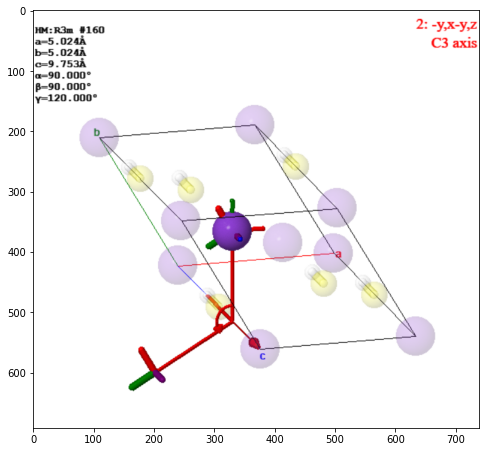

In [9]:
plt.figure(figsize = (8,8))
plt.imshow(mpimg.imread('Op1.PNG'))
plt.show()

# Operation 2 : réflexion (-y, -x, z)

In [15]:
print('Symétrie 2 : ')
print(' \n Matrice de rotation :')
print(op1)
print('\n Vecteur de translation : ')
print(vect1)
print('\n Equation pour obtenir les nouvelles coordonnées fractionnaires de l\'atome H :')
print(op1, '*',Hpos,'+',vect1,'=',Hnew)


Symétrie 2 : 
 
 Matrice de rotation :
[[ 0. -1.  0.]
 [-1.  0.  0.]
 [ 0.  0.  1.]]

 Vecteur de translation : 
[0. 0. 0.]

 Equation pour obtenir les nouvelles coordonnées fractionnaires de l'atome H :
[[ 0. -1.  0.]
 [-1.  0.  0.]
 [ 0.  0.  1.]] * [0.33333333 0.66666667 0.02237158] + [0. 0. 0.] = [-0.66666667 -0.33333333  0.02237158]


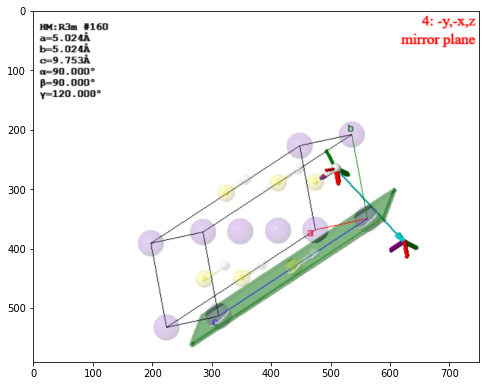

In [11]:
plt.figure(figsize = (8,8))
plt.imshow(mpimg.imread('Op2.PNG'))
plt.show()

# Opération 3 :  rotation hélicoïdale d'ordre 3 (-x+y+1/3, -x-1/3, z-1/3)

In [14]:
print('Symétrie 3 : ')
print(' \n Matrice de rotation :')
print(op2)
print('\n Vecteur de translation : ')
print(vect2)
print('\n Equation pour obtenir les nouvelles coordonnées fractionnaires de l\'atome S :')
print(op2, '*',Spos,'+',vect2,'=',Snew)

Symétrie 3 : 
 
 Matrice de rotation :
[[-1.  1.  0.]
 [-1.  0.  0.]
 [ 0.  0.  1.]]

 Vecteur de translation : 
[0.33333333 0.66666667 0.66666667]

 Equation pour obtenir les nouvelles coordonnées fractionnaires de l'atome S :
[[-1.  1.  0.]
 [-1.  0.  0.]
 [ 0.  0.  1.]] * [0.33333333 0.66666667 0.16102983] + [0.33333333 0.66666667 0.66666667] = [0.66666667 0.33333333 0.82769649]


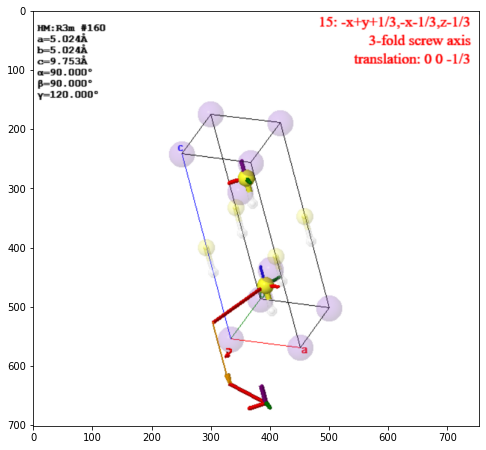

In [13]:
plt.figure(figsize = (8,8))
plt.imshow(mpimg.imread('Op3.PNG'))
plt.show()